In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [49]:
def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

In [50]:
def kmeans(X, k):
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False
    while not converged:
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

        # find the cluster that's closest to each point
        closestCluster = np.argmin(distances, axis=1)

        # update clusters by taking the mean of all of the points assigned to that cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)

        # converge if clusters haven't moved

        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)
    clustersWithNoPoints = []

    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
    return clusters, stds

In [51]:
class RBFNet(object):
    def __init__(self, k=2, lr=0.01, epochs=1000, rbf=rbf):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
    def fit(self, X, y):
        self.centers, self.stds = kmeans(X, self.k)
        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b
                loss = (y[i] - F).flatten() ** 2
                """print('Loss: {0:.2f}'.format(loss[0]))"""
                # backward pass
                error = -(y[i] - F).flatten()
                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            y_pred.append(F)
        return np.array(y_pred)

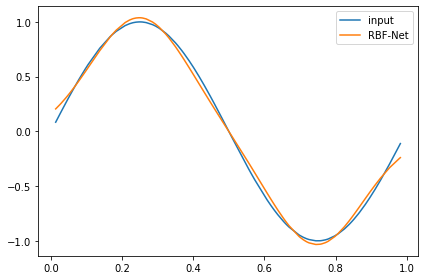

In [59]:
# sample inputs without noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)

y = np.sin(2 * np.pi * X)  
rbfnet = RBFNet(lr=0.01, k=2)
rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)
plt.plot(X, y, label='input')
plt.plot(X, y_pred, label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()

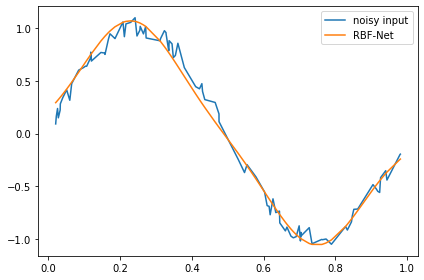

In [52]:
# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X)  + noise
rbfnet = RBFNet(lr=0.01, k=2)
rbfnet.fit(X, y)
y_pred = rbfnet.predict(X)
plt.plot(X, y, label='noisy input')
plt.plot(X, y_pred, label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
class KMeans:
    def __init__(self,k):
      self.k = k

    def fit(self,x):
      
      #Random Centroids
      centroids = x[np.random.choice(x.shape[0], self.k,replace= False)]

      #Clusters's Distance From 2D-points
      distance = cdist(x, centroids ,'euclidean') 
     
      #Label Assignment to K Clusters
      label = np.array([np.argmin(i) for i in distance]) 
     
      iterations = 100
      for i in range(iterations): 
        centroids = []
        for icluster in range(self.k):
          #Updating Centroids by taking mean of Cluster it belongs to
          centroids.append(np.array(x)[label == icluster].mean(axis=0))
         
        distances = cdist(x, centroids ,'euclidean')
        label = np.array([np.argmin(i) for i in distances])
         
      return centroids,label 

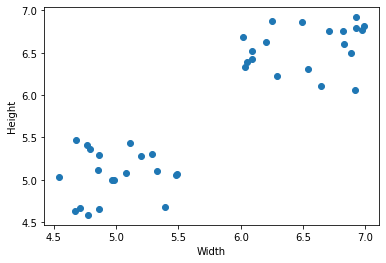

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def get_data():
    X = []  # create an artificial data-set


    for i in range(20):
        X.append(np.random.uniform(low=4.5, high=5.5, size=(2)))

    for i in range(20):
        X.append(np.random.uniform(low=6, high=7, size=(2)))


    return np.array(X)


X = get_data()  # creates an artificial data-set

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

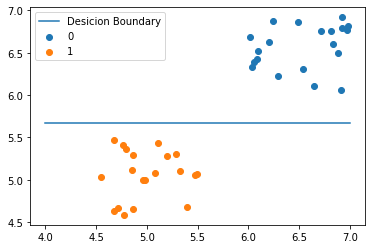

In [56]:
# sample inputs and add noise

#plt.scatter(X[:, 0], X[:, 1])
rbfnet2 = RBFNet(lr=0.01, k=2)
f=rbfnet2.fit(X[:, 0], X[:, 1])

km = KMeans(k = 2) 
cluster_centers,label = km.fit(X)
label2=label
y_pred1 = rbfnet2.predict(label2)

#Visualize the results
u_labels = np.unique(label2)
for i in u_labels:
    plt.scatter(np.array(X)[label == i , 0] , np.array(X)[label == i , 1] , label = i)

x=np.linspace(4.0,7.0,40,endpoint=True)
plt.plot(x,y_pred1, label="Desicion Boundary")
plt.legend()

plt.show()



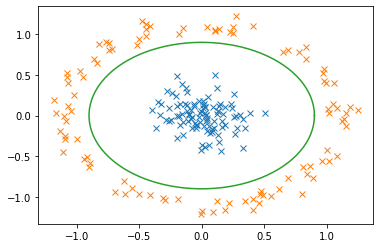

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Create and plot multivariate normal distribution
mean = [0, 0]
cov = [[1,0],[0,1]]
x, y = np.random.multivariate_normal(mean, cov, 100).T

plt.plot(x*0.2, y*0.2, 'x')


# Generate z    
def g(xy):
    res_z = []
    for z in xy:
        z = np.array(z)
        res_z.append(z / 10 + z / np.linalg.norm(z))
    return res_z
xy = zip(x, y)
res_z = g(xy)

# Plot z
zx, zy = zip(*res_z)

plt.plot(zx, zy, 'x')




rbfnet3 = RBFNet(lr=0.01, k=2)
f=rbfnet3.fit(x, zx)

y_pred2 = rbfnet2.predict(y)

angle = np.linspace( 0 , 2*np.pi , 100 ) 
radius=sum(y_pred2)/len(y_pred2)
 
x = radius * np.cos( angle ) 
y = radius * np.sin( angle ) 
 
plt.plot( x/(2*np.pi), y/(2*np.pi)) 




plt.show()